# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

api_keys = weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={api_keys}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    try:
        # Make the API request
        response = requests.get(city_url)
        
        # Check if the response is successful
        if response.status_code == 200:
            # Parse the JSON and retrieve data
            city_weather = response.json()

            # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
            city_lat = city_weather["coord"]["lat"]
            city_lng = city_weather["coord"]["lon"]
            city_max_temp = city_weather["main"]["temp_max"]
            city_humidity = city_weather["main"]["humidity"]
            city_clouds = city_weather["clouds"]["all"]
            city_wind = city_weather["wind"]["speed"]
            city_country = city_weather["sys"]["country"]
            city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | belmonte
Processing Record 2 of Set 1 | shakawe
Processing Record 3 of Set 1 | sao joao da barra
Processing Record 4 of Set 1 | puerto ayora
Processing Record 5 of Set 1 | georgetown
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | nova vicosa
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | blackmans bay
Processing Record 12 of Set 1 | bikenibeu village
Processing Record 13 of Set 1 | susuman
Processing Record 14 of Set 1 | szazhalombatta
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | mount pearl
Processing Record 17 of Set 1 | siem reap
Processing Record 18 of Set 1 | iskateley
Processing Record 19 of Set 1 | flying fish cove
Processing Record 20 of Set 1 | tselinnoye
Processing Record 21 of Set 1 | vorgashor
Processing Record 22 of Se

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belmonte,-15.8631,-38.8828,300.04,86,100,3.85,BR,1708051435
1,shakawe,-18.3667,21.8500,297.03,40,71,2.44,BW,1708051435
2,sao joao da barra,-21.6403,-41.0511,296.14,94,88,3.01,BR,1708051435
3,puerto ayora,-0.7393,-90.3518,301.23,94,80,1.34,EC,1708051435
4,georgetown,5.4112,100.3354,303.12,60,20,3.60,MY,1708051290


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv('city_weather_data.csv', index=False)


In [7]:
# Read saved data
city_data_df = pd.read_csv("city_weather_data.csv")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belmonte,-15.8631,-38.8828,300.04,86,100,3.85,BR,1708051435
1,shakawe,-18.3667,21.8500,297.03,40,71,2.44,BW,1708051435
2,sao joao da barra,-21.6403,-41.0511,296.14,94,88,3.01,BR,1708051435
3,puerto ayora,-0.7393,-90.3518,301.23,94,80,1.34,EC,1708051435
4,georgetown,5.4112,100.3354,303.12,60,20,3.60,MY,1708051290


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

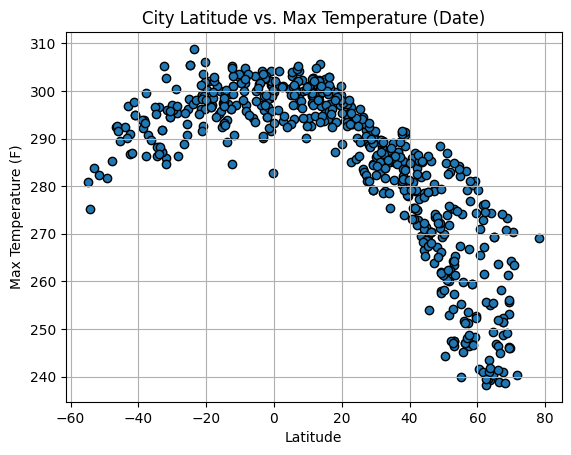

In [8]:



# Create the "output_data" directory if it doesn't exist
os.makedirs("output_data", exist_ok=True)


# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (Date)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

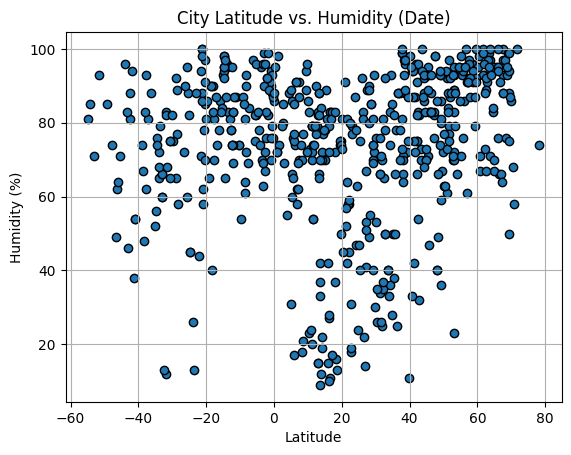

In [9]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (Date)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

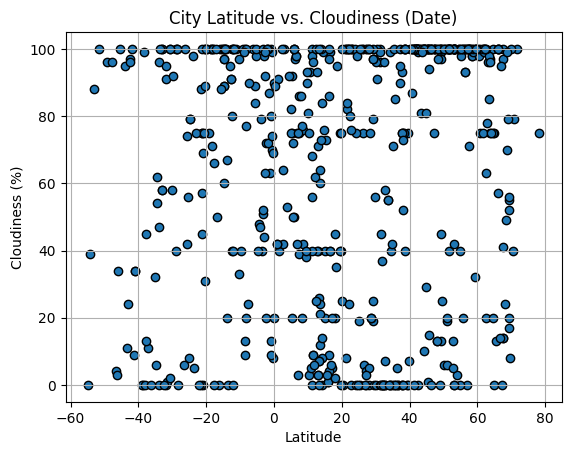

In [10]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (Date)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

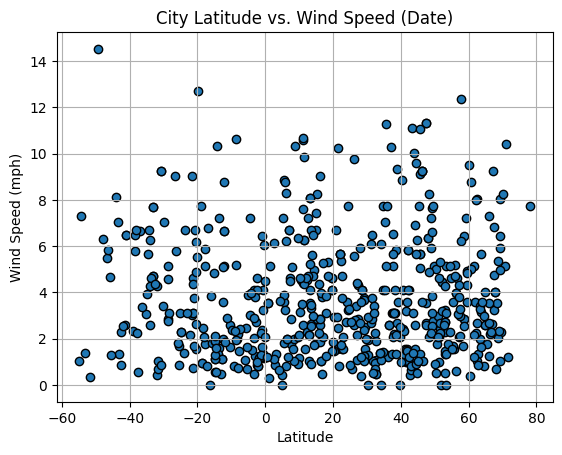

In [11]:
import matplotlib.pyplot as plt

# Build the scatter plot for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (Date)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
import matplotlib.pyplot as plt
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, xlabel, ylabel, title, fig_name=None):
    """
    Function to compute linear regression and plot the data.

    Parameters:
    - x_values: Values for the x-axis.
    - y_values: Values for the y-axis.
    - xlabel: Label for the x-axis.
    - ylabel: Label for the y-axis.
    - title: Title of the plot.
    - fig_name (optional): Name of the file to save the plot. If not provided, the plot will be displayed but not saved.
    """
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}\nR-squared = {rvalue**2:.2f}"

    # Create scatter plot
    plt.scatter(x_values, y_values)

    # Plot regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Add equation and R-squared value
    plt.annotate(line_eq, xy=(1.05, 0.85), xycoords='axes fraction', fontsize=12, color="red")

    # Save the figure if fig_name is provided
    if fig_name:
        plt.savefig(fig_name)

    # Show plot
    plt.show()


In [13]:
# Assuming you already have a DataFrame named 'city_data_df' containing all the city data

# Create a DataFrame with Northern Hemisphere data
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,georgetown,5.4112,100.3354,303.12,60,20,3.60,MY,1708051290
8,tiksi,71.6872,128.8694,240.39,100,100,1.21,RU,1708051436
9,isafjordur,66.0755,-23.1240,263.71,76,57,1.25,IS,1708051436
11,bikenibeu village,1.3673,173.1241,304.13,74,40,5.14,KI,1708051437
12,susuman,62.7833,148.1667,239.25,91,78,1.34,RU,1708051437


In [14]:
# Assuming you already have a DataFrame named 'city_data_df' containing all the city data

# Create a DataFrame with Southern Hemisphere data
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,belmonte,-15.8631,-38.8828,300.04,86,100,3.85,BR,1708051435
1,shakawe,-18.3667,21.8500,297.03,40,71,2.44,BW,1708051435
2,sao joao da barra,-21.6403,-41.0511,296.14,94,88,3.01,BR,1708051435
3,puerto ayora,-0.7393,-90.3518,301.23,94,80,1.34,EC,1708051435
5,adamstown,-25.0660,-130.1015,298.22,82,8,3.10,PN,1708051435


###  Temperature vs. Latitude Linear Regression Plot

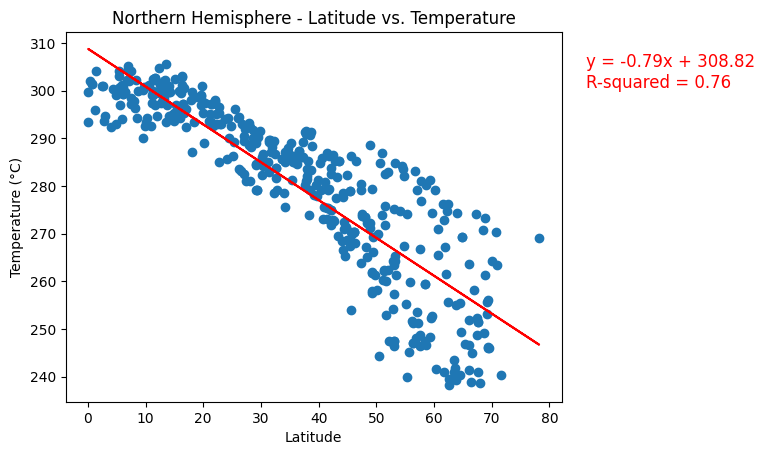

In [15]:
# Assuming you have already imported necessary libraries and defined the plot_linear_regression function

# Extract latitude and temperature data from the Northern Hemisphere DataFrame
north_latitudes = northern_hemi_df['Lat']
north_temperatures = northern_hemi_df['Max Temp']

# Plot linear regression for Northern Hemisphere - Latitude vs. Temperature
plot_linear_regression(north_latitudes, north_temperatures, "Latitude", "Temperature (°C)", "Northern Hemisphere - Latitude vs. Temperature")


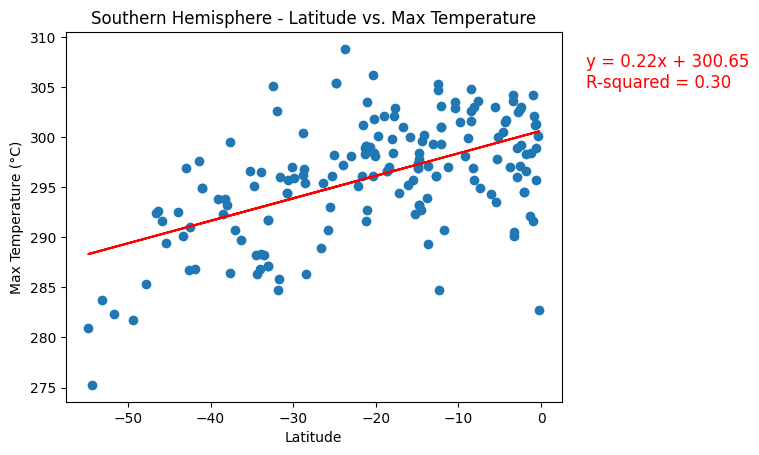

In [16]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temperature (°C)", "Southern Hemisphere - Latitude vs. Max Temperature")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

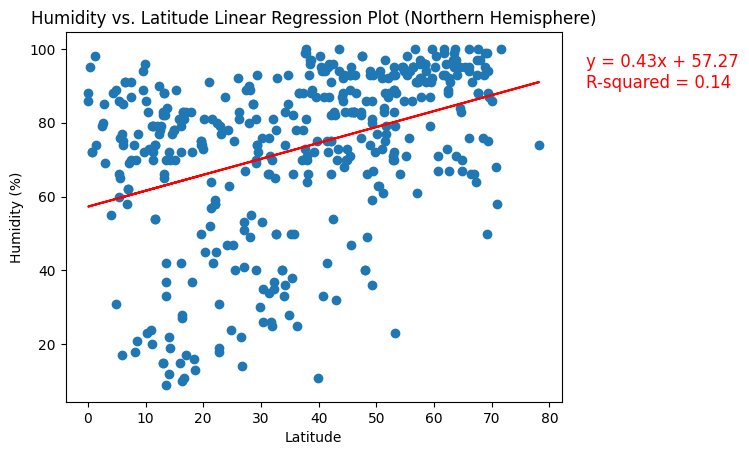

In [17]:
# Extract data for the Northern Hemisphere (latitude >= 0)
northern_df = city_data_df[city_data_df['Lat'] >= 0]
northern_humidity = northern_df['Humidity']
northern_latitude = northern_df['Lat']

# Extract data for the Southern Hemisphere (latitude < 0)
southern_df = city_data_df[city_data_df['Lat'] < 0]
southern_humidity = southern_df['Humidity']
southern_latitude = southern_df['Lat']

# Linear regression plot for Humidity vs. Latitude in the Northern Hemisphere
plot_linear_regression(northern_latitude, northern_humidity, "Latitude", "Humidity (%)", "Humidity vs. Latitude Linear Regression Plot (Northern Hemisphere)")

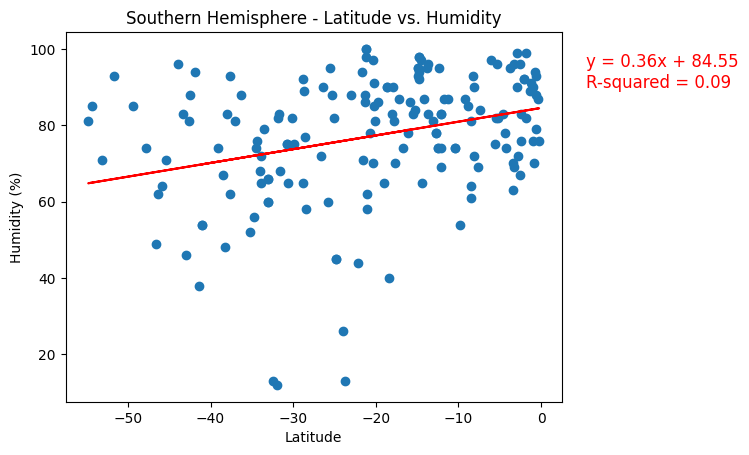

In [18]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity (%)", "Southern Hemisphere - Latitude vs. Humidity")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

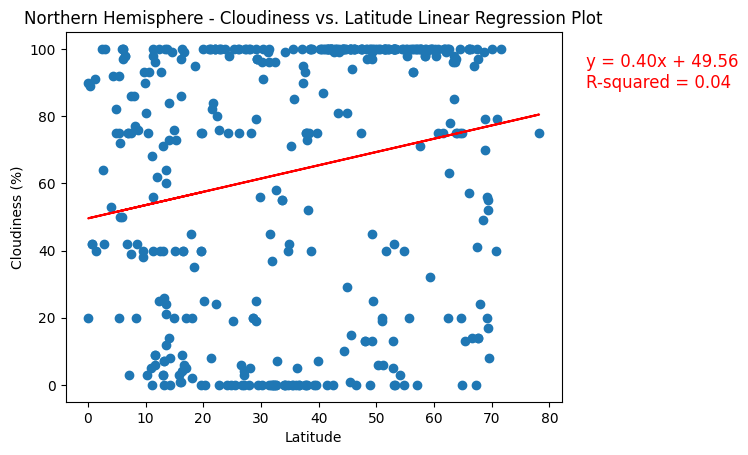

In [19]:
# Extract cloudiness and latitude data for Northern Hemisphere
north_cloudiness = northern_hemi_df["Cloudiness"]
north_latitude = northern_hemi_df["Lat"]

# Extract cloudiness and latitude data for Southern Hemisphere
south_cloudiness = southern_hemi_df["Cloudiness"]
south_latitude = southern_hemi_df["Lat"]

# Linear regression plot for Cloudiness vs. Latitude in Northern Hemisphere
plot_linear_regression(north_latitude, north_cloudiness, "Latitude", "Cloudiness (%)", "Northern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")



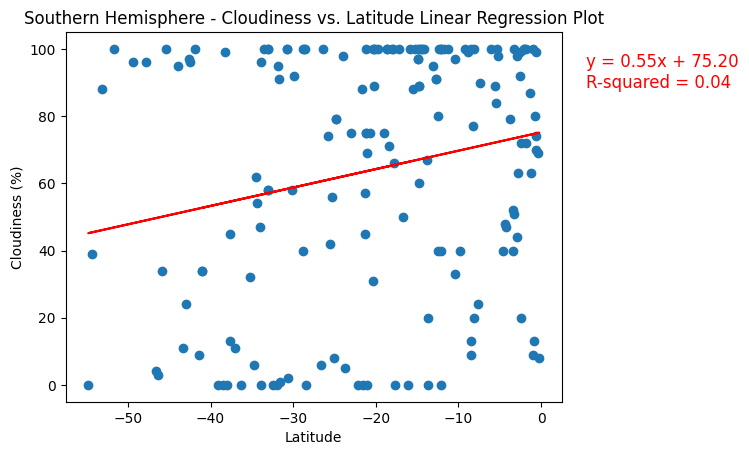

In [20]:
# Linear regression plot for Cloudiness vs. Latitude in Southern Hemisphere
plot_linear_regression(south_latitude, south_cloudiness, "Latitude", "Cloudiness (%)", "Southern Hemisphere - Cloudiness vs. Latitude Linear Regression Plot")


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

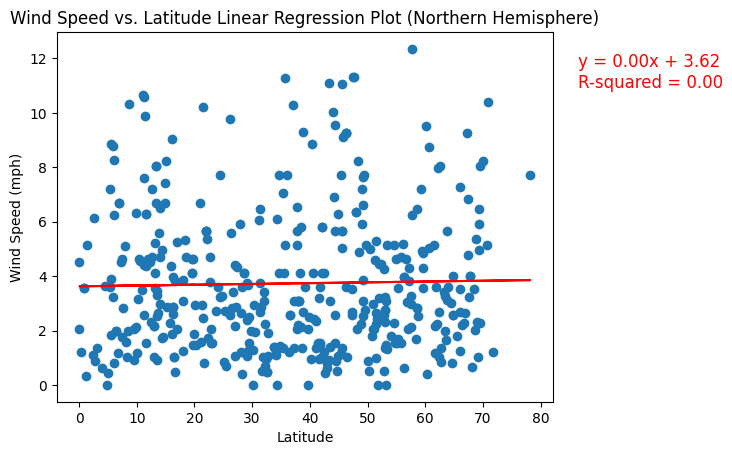

In [21]:
# Extract Northern Hemisphere data
northern_df = city_data_df[city_data_df['Lat'] >= 0]

# Extract latitude and wind speed data for Northern Hemisphere
northern_latitudes = northern_df['Lat']
northern_wind_speed = northern_df['Wind Speed']

# Linear regression plot for Wind Speed vs. Latitude in the Northern Hemisphere
plot_linear_regression(northern_latitudes, northern_wind_speed, "Latitude", "Wind Speed (mph)", "Wind Speed vs. Latitude Linear Regression Plot (Northern Hemisphere)")


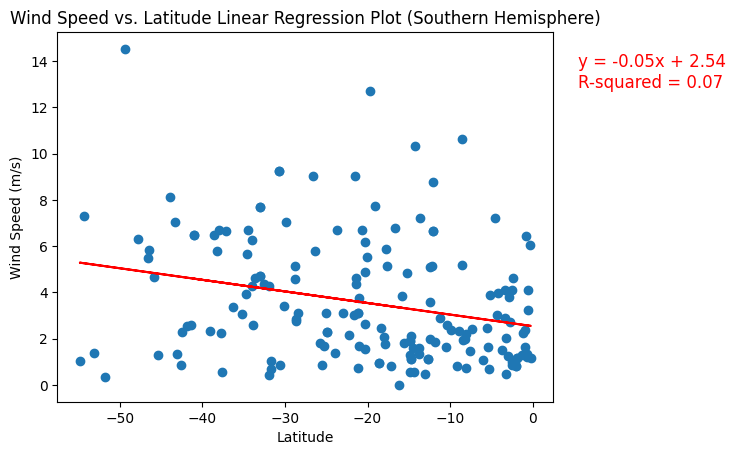

In [22]:
# Extract Southern Hemisphere data
southern_df = city_data_df[city_data_df['Lat'] < 0]

# Extract latitude and wind speed data
southern_latitudes = southern_df['Lat']
southern_wind_speed = southern_df['Wind Speed']

# Linear regression plot for Wind Speed vs. Latitude in the Southern Hemisphere
plot_linear_regression(southern_latitudes, southern_wind_speed, "Latitude", "Wind Speed (m/s)", "Wind Speed vs. Latitude Linear Regression Plot (Southern Hemisphere)")


**Discussion about the linear relationship:** YOUR RESPONSE HERE